In [134]:
import numpy as np
import os
import matplotlib.pyplot as plt
from importlib import reload
import AHM
reload(AHM)
#n=0
date = '110825'

In [135]:
k = np.linspace(0, 2*np.pi, 40)

In [136]:
n

7

In [137]:
n+=1
da=7
db=7
dc=da
na=0
nb=0
nc=na
mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, nA=na, nB=nb, nC=nc, U=1, UB=1, muB=0, mu=0, t=1, inhomp=True, inhomi=True)
alpha=0.8
vals = mM.Deltra(k, Nmax=150, Nmin=30, alpha=alpha)



0 1
[[ 0.+0.j  2.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  -7.+0.j  0.+0.j  0.+0.j]
 [ 2.+0.j  0.+0.j  2.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j -7.+0.j  0.+0.j]
 [ 0.+0.j  2.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j -7.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  2.+0.j  0.+0.j  7.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  2.+0.j  0.+0.j  2.+0.j  0.+0.j  7.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  2.+0.j  0.+0.j  0.+0.j  0.+0.j  7.+0.j
   0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  7.+0.j  0.+0.j  0.+0.j  0.+0.j -2.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  7.+0.j  0.+0.j -2.+0.j  0.+0.j -2.+0.j
   0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  7.+0.j  0.+0.j -2.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j]
 [-7.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j -2.

In [138]:
dels = vals[0]
nus = vals[2]

In [139]:
vals[1]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 0.1860844 , 0.1831112 , 0.17967287, 0.1757753 ,
       0.17145107, 0.16675352, 0.16174371, 0.15647497, 0.15098145,
       0.14527437, 0.13934566, 0.13317615, 0.1267453 , 0.12004028,
       0.11306345, 0.1058376 , 0.09840862, 0.09084522, 0.08323552,
       0.07568091, 0.06828787, 0.06115923, 0.05438606, 0.04804163,
       0.04217802, 0.03682537, 0.03199347, 0.02767483, 0.02384847,
       0.02048386, 0.01754451, 0.01499093, 0.01278293, 0.01088137,
       0.00924922, 0.00785227, 0.00665946, 0.00564297, 0.00477818,
       0.00404348, 0.00342001, 0.00289145, 0.00244372, 0.0020647 ,
       0.00174404, 0.00147288])

In [140]:
dels[:,-5:]

array([[0.27725986+0.j, 0.27682898+0.j, 0.27646712+0.j, 0.27616313+0.j,
        0.27590772+0.j],
       [0.05396675+0.j, 0.0532156 +0.j, 0.05258034+0.j, 0.05204315+0.j,
        0.05158895+0.j],
       [0.27725986+0.j, 0.27682898+0.j, 0.27646712+0.j, 0.27616313+0.j,
        0.27590772+0.j]])

In [141]:
s1 = [np.sum(nus[:,i]) for i in range(np.shape(nus)[1])]


In [142]:
fol = f'calc{date}_{n}'
newpath = r"C:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\Pictures\scf\'"+fol

if not os.path.exists(newpath):
    os.makedirs(newpath)

filename = "parameters.txt"

text = os.path.join(newpath, filename)

with open(text, "w") as file:
    file.write(f"mM = AHM.Model(Del0A, Del0B, Del0C= {dels[:,0]}, nA, nB, nC={nus[:,0]}, U={mM.U}, UB={mM.UB}, mu={mM.mu}, muB={mM.muB}, t={mM.t}, inhomp={mM.inhomp}, inhomi={mM.inhomi})\n alpha={alpha}\n dels: {dels}\nnus: {nus}")
    file.close

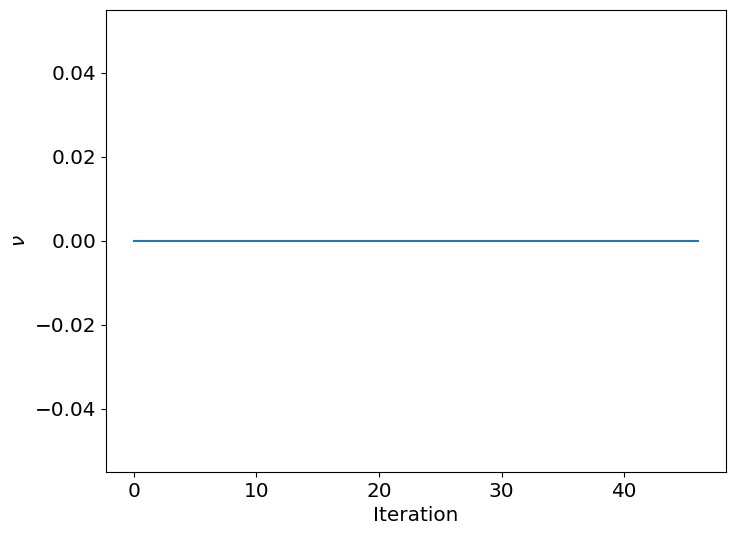

In [143]:
plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\nu$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)

plt.plot(np.arange(len(s1)), s1, label = r'no hopping')


#plt.legend()
plt.savefig(newpath+"//nu.png")
plt.show()

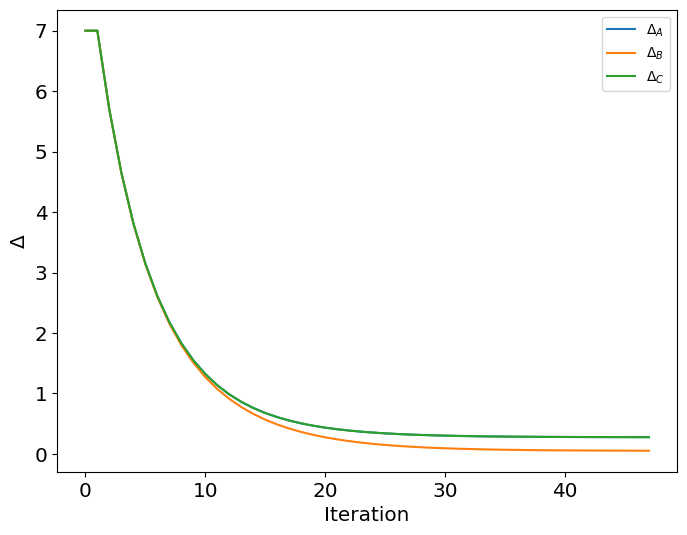

In [144]:
plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\Delta$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)

plt.plot(np.arange(len(dels[0])), dels[0], label = r'$\Delta_A$')
plt.plot(np.arange(len(dels[0])), dels[1], label = r'$\Delta_B$')
plt.plot(np.arange(len(dels[0])), dels[2], label = r'$\Delta_C$')
#plt.plot(np.arange(len(dels[0])), np.abs(dels[0]), label = r'$\Delta_A$')
#plt.plot(np.arange(len(dels[0])), np.abs(dels[1]), label = r'$\Delta_B$')
#plt.plot(np.arange(len(dels[0])), np.abs(dels[2]), label = r'$\Delta_C$')

plt.legend()
plt.savefig(newpath+"//dels.png")

plt.show()

In [145]:
da, db, dc = dels[:,-1]
na, nb, nc = nus[:,-1]
#mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, nA=na, nB=nb, nC=nc,mu=0, U=3, t=1, inhomp=False, inhomi=True)
H = mM.HBdG()
k = np.linspace(0, np.pi, 100)

k1 = np.ones(100)
k0 = np.zeros(100)
path = np.concatenate((k, k, k*np.sqrt(2)))
kx = np.concatenate((k,np.pi*k1, k[::-1]))
ky = np.concatenate((k0, k, k[::-1]))

p = [i for i in range(np.shape(path)[0])]
np.shape(p)
energies = mM.solvHam(kx, ky)

np.shape(energies)
emax = np.amax(energies)
emax = emax+0.1*emax

In [146]:
energies.T

array([[-2.94538994, -2.94538994, -2.72090182, ...,  2.72090182,
         2.94538994,  2.94538994],
       [-2.94521223, -2.94521223, -2.72072411, ...,  2.72072411,
         2.94521223,  2.94521223],
       [-2.94467922, -2.94467922, -2.7201911 , ...,  2.7201911 ,
         2.94467922,  2.94467922],
       ...,
       [-2.94396832, -2.94396832, -2.7194802 , ...,  2.7194802 ,
         2.94396832,  2.94396832],
       [-2.94503451, -2.94503451, -2.72054639, ...,  2.72054639,
         2.94503451,  2.94503451],
       [-2.94538994, -2.94538994, -2.72090182, ...,  2.72090182,
         2.94538994,  2.94538994]])

In [147]:
np.savetxt(newpath +"//dels.txt", dels, delimiter=",")
np.savetxt(newpath +"//nus.txt", nus, delimiter=",")
np.savetxt(newpath +"//energies.txt", energies, delimiter=",")

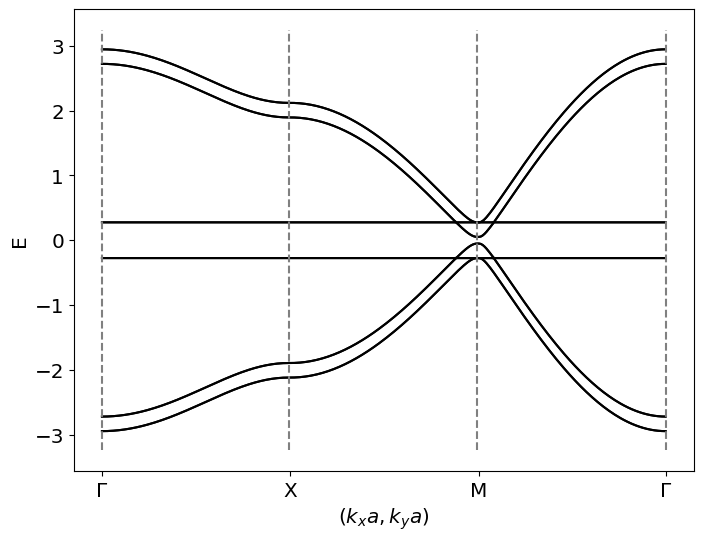

In [148]:
plt.figure(figsize=(8,6))
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-0.5, 0.5))

for i in energies:
    plt.plot(p, i, color='black')
#for i in energies2:
#    plt.plot(p, i, color='green', linestyle='dashdot')
#plt.plot(p, energies4[0], color='black', label=r'$\Delta_0=0.5$')
#plt.plot(p, energies2[0], color='green', linestyle='dashdot', label=r'$\Delta_0=1$')

plt.vlines([0, 99, 199, 299], [-emax, -emax, -emax, -emax], [emax, emax, emax, emax], colors= 'grey', linestyles='--')
#plt.vlines(250, -2, 2)
#plt.legend(fontsize='x-large')
#plt.savefig("Pictures/ESCpath.png")
plt.savefig(newpath+"//bands.png")

plt.show()

In [149]:
mM.Hk(0,0)

array([[ 0.        +0.j,  2.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.27569307-0.j,  0.        +0.j,  0.        +0.j],
       [ 2.        +0.j,  0.        +0.j,  2.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j, -0.05120495-0.j,  0.        +0.j],
       [ 0.        +0.j,  2.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j, -0.27569307-0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  2.        +0.j,  0.        +0.j,
         0.27569307+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.       

In [151]:
Earr = np.linspace(-emax,emax,250)
DOS = mM.DOS(Earr, k, sig=0.025)
DOS[0]

1.824208386311168e-29

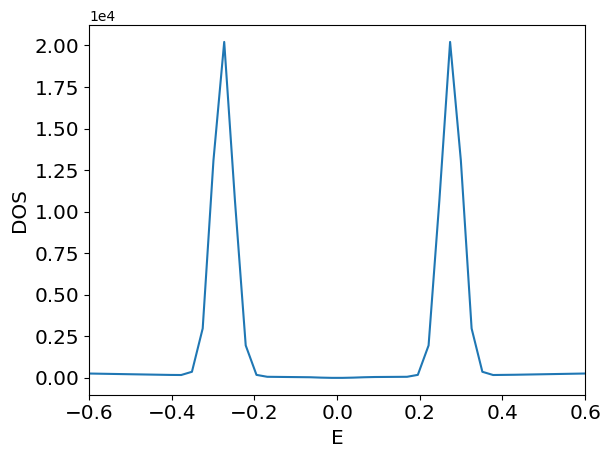

In [152]:
plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
plt.xlim(-0.6, 0.6)
plt.plot(Earr, DOS)

#plt.vlines([emax, -emax], 0, 100, colors='black')
#plt.legend()
plt.savefig(newpath+"//DOS.png")
plt.show()